Source: 

In [12]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore 
from sklearn import preprocessing # type: ignore  
import warnings

In [13]:
dataset_directory = "concrete.csv" 
dataset = pd.read_csv(dataset_directory)

In [14]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Activity 1:

<Axes: xlabel='label'>

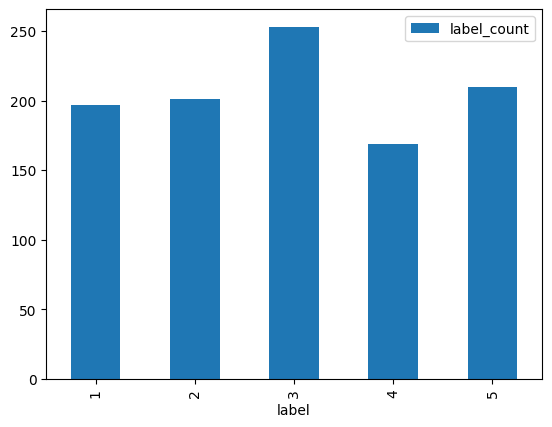

In [15]:
def label(strength): 
    if (strength < 20):  
        return 1
    elif (strength >= 20 and strength < 30): 
        return 2 
    elif (strength >= 30 and strength < 40): 
        return 3
    elif (strength >= 40  and strength < 50): 
        return 4
    else: 
        return 5
     
dataset['label'] = dataset['strength'].apply(label) 
dataset.to_csv("converted_concrete.csv", index=False) 
 
data_dist = dataset.groupby('label') 
data_dist = pd.DataFrame({ 'label_count' : data_dist['label'].count(), }).reset_index() 
data_dist.plot.bar(x='label', y='label_count')

In [16]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,label
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,4
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


Activity 2:

In [17]:
# Question 1 
print(dataset['age'].unique()) 
dataset['age'] = dataset.age.astype('category') 

[ 28  14  90   7  56   3 100  91 180 365 270 360 120   1]


In [18]:
#Question 2 
norm_columns = [e for e in dataset.columns if e not in ['age', 'strength', 'label']] 
for column in norm_columns: 
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min()) 
dataset.to_csv('normalised_concrete.csv', index=False)

In [19]:
# Question 3 
print(dataset.cov())  

dataset['cement_slag'] = dataset['cement'] + dataset['slag'] 
dataset['cement_ash'] = dataset['cement'] + dataset['ash']  
dataset['water_fineagg'] = dataset['water'] + dataset['fineagg']  
dataset['ash_superplastic'] = dataset['ash'] + dataset['superplastic']  
dataset.to_csv('features_concrete.csv', index=False)

                cement      slag       ash     water  superplastic  coarseagg  \
cement        0.056929 -0.015764 -0.030331 -0.003320      0.004090  -0.005897   
slag         -0.015764  0.057631 -0.024844  0.004392      0.001927  -0.015410   
ash          -0.030331 -0.024844  0.102288 -0.014018      0.022399  -0.000720   
water        -0.003320  0.004392 -0.014018  0.029091     -0.020806  -0.007028   
superplastic  0.004090  0.001927  0.022399 -0.020806      0.034419  -0.011154   
coarseagg    -0.005897 -0.015410 -0.000720 -0.007028     -0.011154   0.051089   
fineagg      -0.010689 -0.013598  0.005089 -0.015461      0.008310  -0.008115   
age           1.235113 -0.670986 -3.118798  2.991146     -2.258343  -0.043061   
strength      1.984345  0.540728 -0.565040 -0.825266      1.134588  -0.622790   
label         0.159406  0.033284 -0.036528 -0.056892      0.086523  -0.054950   

               fineagg          age    strength      label  
cement       -0.010689     1.235113    1.984345

Activity 3:

In [6]:
import pandas as pd 
dataset_directory = "concrete.csv" 
dataset = pd.read_csv(dataset_directory) 
dataset = dataset.drop(columns=['slag', 'ash','fineagg', 'strength']) 
dataset.to_csv('selected_feature_concrete.csv', index=False)

Activity 4: 

In [ ]:
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
 
concrete = pd.read_csv("normalised_concrete.csv") 

feature_cols = ['cement', 'water', 'superplastic', 'age'] 
x = concrete[feature_cols] # Feature
y = concrete['label']  # Tsrgte Variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  
 
# Creating the decision tree
clf = DecisionTreeClassifier()  
# Training the decision tree
clf = clf.fit(x_train, y_train)  
# Validate the results
y_pred = clf.predict(x_test)  
# Model Accuracy how often the classifer correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6310679611650486


Activity 5

In [ ]:
import pandas as pd

# Load the 'converted_concrete.csv' dataset
converted_concrete = pd.read_csv("converted_concrete.csv")

# Select the relevant features for the 'selected_converted_concrete' dataset
selected_features = ['cement', 'water', 'superplastic', 'age']

# Create the new dataframe with the selected features
selected_converted_concrete = converted_concrete[selected_features + ['label']]

# Save the new dataframe to a CSV file
selected_converted_concrete.to_csv("selected_converted_concrete.csv", index=False)

print("selected_converted_concrete.csv file has been created.")


selected_converted_concrete.csv file has been created.


In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the datasets
datasets = {
    'converted_concrete': pd.read_csv("converted_concrete.csv"),
    'normalised_concrete': pd.read_csv("normalised_concrete.csv"), 
    'features_concrete': pd.read_csv("features_concrete.csv"),
    'selected_feature_concrete': pd.read_csv("selected_feature_concrete.csv"), 
    'selected_converted_concrete': pd.read_csv("selected_converted_concrete.csv")
}

# Initialize a dictionary to store accuracies
accuracies = {}

# Loop over datasets, train and evaluate the models
for name, dataset in datasets.items():
    # Define the feature columns and target column based on the dataset structure
    # Adjust the features as necessary based on what each dataset represents
    if name == 'converted_concrete':
        feature_cols = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age']
    elif name == 'normalised_concrete':
        feature_cols = ['cement', 'water', 'superplastic', 'age'] 
    elif name == 'features_concrete':
        feature_cols = ['cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic'] 
    elif name == 'selected_feature_concrete':
        feature_cols = ['cement', 'water', 'superplastic', 'coarseagg', 'cement_slag', 'cement_ash', 'water_fineagg', 'ash_superplastic']
    elif name == 'selected_converted_concrete':
        feature_cols = ['cement', 'water', 'superplastic', 'age'] 
    
    x = dataset[feature_cols]
    y = dataset['label']  # Assume 'label' is the target variable in all datasets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
    
    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = clf.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracies[name] = accuracy

# Print out the results
for dataset_name, accuracy in accuracies.items():
    print(f"{dataset_name} Accuracy: {accuracy:.2%}")


converted_concrete Accuracy: 67.31%
normalised_concrete Accuracy: 61.49%
features_concrete Accuracy: 38.19%
selected_feature_concrete Accuracy: 39.81%
selected_converted_concrete Accuracy: 64.08%


For which feature set you obtained the highest accuracy and for which you obtained the lowest one ? 
In the given accuracy results for various feature sets, the highest accuracy was acheived with the "converted_concrete.csv" feature set, which yielded an accuracy of 67.31%. This indicates that the process of converting features in this particular set effectively enchanced the model's performance. On the other hand, the lowest accuracy was observed with the "features_concrete" set, which only acheived 38.19% accuracy. This suggest that the features included in the "features_concrete" set were not as effective in predcting the target variable, resulting in the poorest performance among all the evaluated feature sets. Comparing the highest and lowest accuracies highlights the importance of selecting and engineering the right features to improve model performance.